<h2>Extracting and Visualizing Stock Data</h2>



In [34]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

I will use yfinance library to extract Stock Data

Using the `Ticker` function enter the ticker symbol of the stock I want to extract data to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`, and Amazon and its ticker symbol is `AMZN`.

Extracted stock information by using the ticker object and the function `history`,  and saved it in variables named `tesla_data` and `amazon_data`. Set the `period` parameter to ` "max" ` so I got information for the maximum amount of time.

Next, I extracted annual revenue information using function `financials`.

Created the dashboard to compare  Historical Open Prices Date and Revenue of tesla and Amazon.

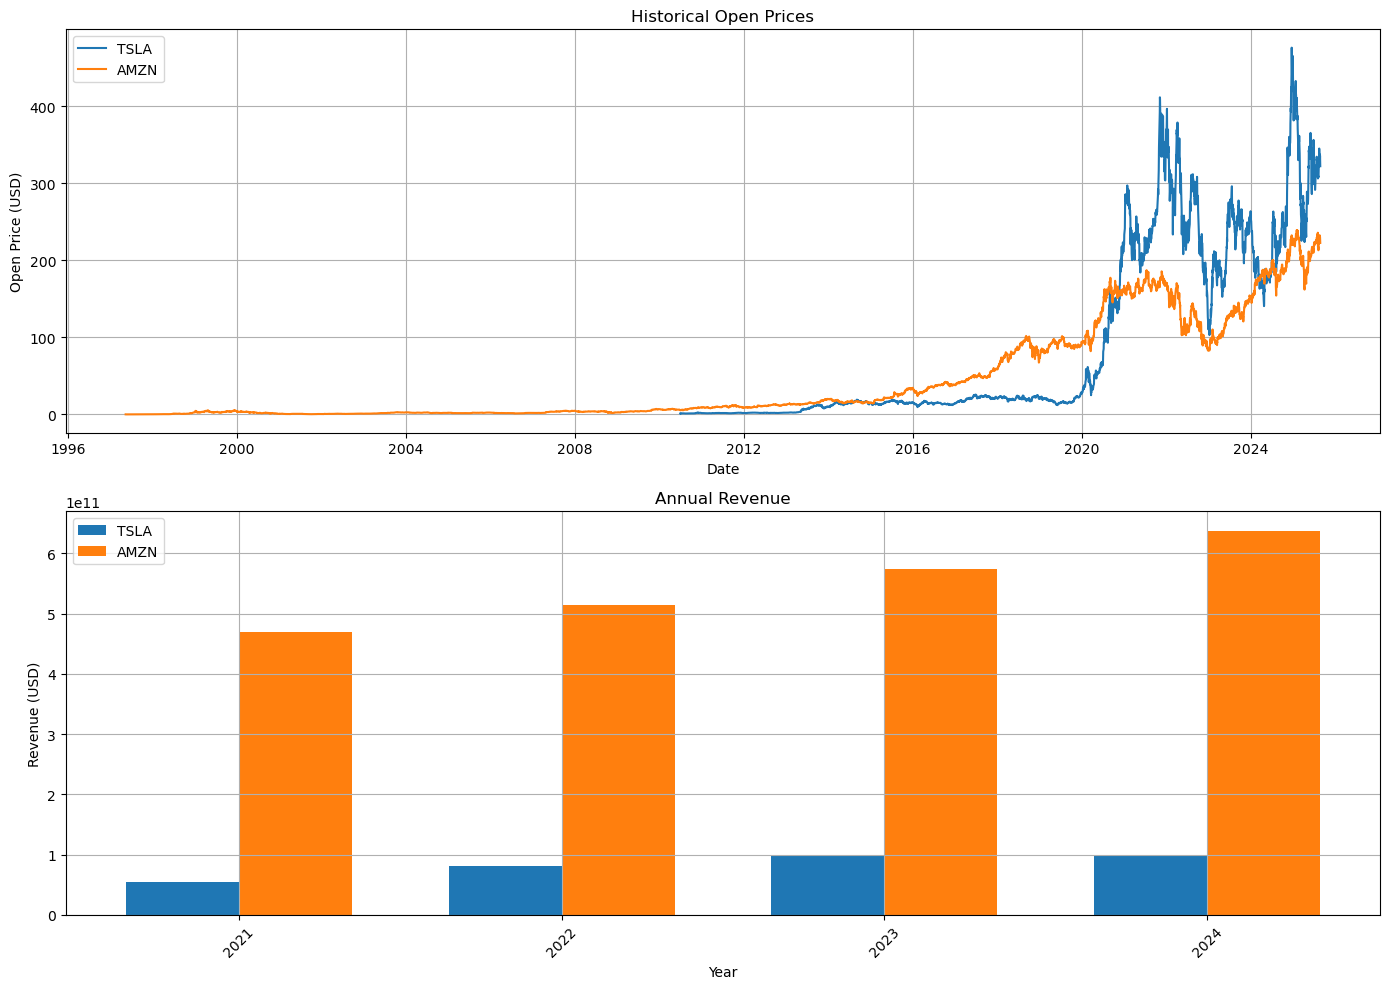

In [39]:
# --- Get stock data ---
tickers = ["TSLA", "AMZN"]
data = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)
    hist = stock.history(period="max")
    financials = stock.financials.T

    # Keep only Revenue
    if "Total Revenue" in financials.columns:
        revenue = financials["Total Revenue"]
        revenue = revenue.dropna().sort_index()
    else:
        revenue = pd.Series(dtype=float)

    data[ticker] = {
        "history": hist,
        "revenue": revenue
    }

# --- Create dashboard with Matplotlib ---
fig, axes = plt.subplots(2, 1, figsize=(14, 10))  # 2 rows, 1 column

# --- Historical Open Prices Chart ---
for ticker in tickers:
    hist = data[ticker]["history"]
    axes[0].plot(hist.index, hist["Open"], label=ticker)
axes[0].set_title("Historical Open Prices")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Open Price (USD)")
axes[0].legend()
axes[0].grid(True)

# --- Annual Revenue Chart ---
width = 0.35  # bar width
x = None      # will compute x positions

for i, ticker in enumerate(tickers):
    revenue = data[ticker]["revenue"]
    if not revenue.empty:
        if x is None:
            x = range(len(revenue))
            labels = revenue.index.strftime("%Y")
        axes[1].bar([pos + i*width for pos in x], revenue.values, width=width, label=ticker)
axes[1].set_title("Annual Revenue")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Revenue (USD)")
axes[1].set_xticks([pos + width/2 for pos in x])
axes[1].set_xticklabels(labels, rotation=45)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [38]:
data['TSLA']['revenue']

2020-12-31             NaN
2021-12-31    5.382300e+10
2022-12-31    8.146200e+10
2023-12-31    9.677300e+10
2024-12-31    9.769000e+10
Name: Total Revenue, dtype: float64

In [40]:
data['AMZN']['revenue']

2021-12-31    4.698220e+11
2022-12-31    5.139830e+11
2023-12-31    5.747850e+11
2024-12-31    6.379590e+11
Name: Total Revenue, dtype: float64